Most vehicles in the brazilian domestic market have flex-fuel technology: they are designed to run on ethanol and or gasoline.

As gasoline prices hit an all-time high, brazilian drivers face a dilemma: which one of these fuels is cheaper to run?

The media often informs that ethanol mileage is equal to 70% of gasoline mileage, meaning that if the ethanol price is over 70% of the gasoline price, it's advised to buy gasoline. The threshold seems to be 70% and gas stations tend to adjust their prices around that number.

The objective of this project is to investigate whether or not that is true.

The data used was taken from the *National Institute of Metrology, Standardization and Industrial Quality (INMETRO)*, an institute that tests fuel mileage (city and highway) of all vehicles in the brazilian domestic market. 

Link to an article explaining how to calculate if ethanol is cheaper to run: https://g1.globo.com/economia/noticia/2022/03/10/nova-alta-da-gasolina-vale-a-pena-abastecer-com-etanol-entenda-como-calcular.ghtml

Link to *INMETRO*'s vehicle dataset: https://www.gov.br/inmetro/pt-br/assuntos/avaliacao-da-conformidade/programa-brasileiro-de-etiquetagem/tabelas-de-eficiencia-energetica/veiculos-automotivos-pbe-veicular/veiculos-leves-2021



---



# **Exploring the Data**
Importing libraries and analysing the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# To read the PDF file
!pip install tabula-py
import tabula

     |████████████████████████████████| 12.0 MB 23.8 MB/s 


In [2]:
# Loading the dataset
url_path="https://www.gov.br/inmetro/pt-br/assuntos/avaliacao-da-conformidade/programa-brasileiro-de-etiquetagem/tabelas-de-eficiencia-energetica\
/veiculos-automotivos-pbe-veicular/veiculos-leves-2021/@@download/file/pbe-veicular-2021.pdf"

import subprocess
def get_table():
  n=1
  while True:
    try:
      # Workaround to get the table on the first page
      if n==1:
        # area coordinates (top, left, height, width)
        # lista_tabelas_init=tabula.read_pdf("pbe-veicular-2021.pdf", pages='1', pandas_options={'header': None}, area=(257.29, 40.49, 672.85, 784.91))
        lista_tabelas_init=tabula.read_pdf(url_path, pages='1', pandas_options={'header': None}, area=(253.29, 40.49, 672.85, 784.91), stream=True)
        firstTab=lista_tabelas_init[0]
        firstTab=firstTab.iloc[1:,:]
        lista_conc=firstTab.copy()
        n+=1
      # Other pages
      else:
        # lista_tabelas_rest=tabula.read_pdf("pbe-veicular-2021.pdf", pages=n, pandas_options={'header': None})
        lista_tabelas_rest=tabula.read_pdf(url_path, pages=n, pandas_options={'header': None})
        lista_conc=pd.concat([lista_conc, lista_tabelas_rest[0]])
        n+=1
    except subprocess.CalledProcessError:
      break
  return lista_conc

In [ ]:
lista_fin=get_table()

In [4]:
headers=['Category', 'Brand', 'Model', 'Version', 'Engine', 'Transmission', 'AC', 'Power steering', 'Engine type', 'Fuel type', 'NMHC (g/km)', 'CO (g/km)', 'NOx (g/km)', \
'Reduction relative to the limit', 'GHG Ethanol CO2 (g/km)', 'GHG Gasoline or Diesel CO2 (g/km)', 'Ethanol city (km/l)', 'Ethanol highway (km/l)', 'Gas or Diesel city (km/l)', \
'Gas or Diesel highway (km/l)', 'Energy consumption (MJ/km)', 'PBE category ranking', 'PBE overall ranking']
lista_fin.columns=headers

df = lista_fin
# Selecting the flex fuel vehicles only
df['Fuel type'].replace(['E','G','D','g'], np.nan, inplace=True)
df.dropna(subset=['Fuel type'], inplace=True)

# Changing ',' into '.'
df=df.replace(',', '.', regex = True)

# All car names with upper case
df['Model'] = df['Model'].str.upper()

# Convert to float format
to_float=['Ethanol city (km/l)', 'Ethanol highway (km/l)', 'Gas or Diesel city (km/l)', 'Gas or Diesel highway (km/l)']
for i in to_float:
  df[i]=df[i].astype(float)

# Creating the Ethanol/Gas ratios
df['Ethanol/Gas city']=df['Ethanol city (km/l)']/df['Gas or Diesel city (km/l)']
df['Ethanol/Gas highway']=df['Ethanol highway (km/l)']/df['Gas or Diesel highway (km/l)']

# Updating index
df.set_index(df.columns[0], inplace=True)
df.reset_index(inplace=True)
df

,Category,Brand,Model,Version,Engine,Transmission,AC,Power steering,Engine type,Fuel type,...,GHG Gasoline or Diesel CO2 (g/km),Ethanol city (km/l),Ethanol highway (km/l),Gas or Diesel city (km/l),Gas or Diesel highway (km/l),Energy consumption (MJ/km),PBE category ranking,PBE overall ranking,Ethanol/Gas city,Ethanol/Gas highway
0,Sub Compacto,FIAT,MOBI,EASY,1.0-8V,M-5,N,M,Combustão,F,...,91.0,9.7,10.7,13.7,15.3,1.47,B,B,0.708029,0.699346
1,Sub Compacto,FIAT,MOBI,LIKE,1.0-8V,M-5,S,H,Combustão,F,...,98.0,8.9,10.0,13.0,14.1,1.59,D,B,0.684615,0.709220
2,Sub Compacto,FIAT,MOBI,TREKKING,1.0-8V,M-5,S,H,Combustão,F,...,98.0,8.9,10.0,13.0,14.1,1.59,D,B,0.684615,0.709220
3,Sub Compacto,FIAT,UNO,DRIVE,1.0-6V,M-5,S,E,Combustão,F,...,94.0,9.1,10.6,13.2,15.2,1.52,C,B,0.689394,0.697368
4,Sub Compacto,FIAT,UNO,WAY E,1.0-6V,M-5,S,E,Combustão,F,...,94.0,9.1,10.6,13.2,15.2,1.52,C,B,0.689394,0.697368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Picape,TOYOTA,HILUX FLEX 4X2,CD SR,2.7-16V,A-6,S,H,Combustão,F,...,186.0,4.8,5.6,6.9,8.1,3.01,D,E,0.695652,0.691358
486,Picape,TOYOTA,HILUX FLEX 4X2,CHALLENGE,2.7-16V,A-6,S,H,Combustão,F,...,186.0,4.8,5.6,6.9,8.1,3.01,D,E,0.695652,0.691358
487,Picape,TOYOTA,HILUX FLEX 4X2,SR,2.7-16V,M-5,S,H,Combustão,F,...,193.0,4.6,5.6,6.6,8.0,3.12,E,E,0.696970,0.700000
488,Picape,TOYOTA,HILUX FLEX 4X2,SRV,2.7-16V,M-5,S,H,Combustão,F,...,193.0,4.6,5.6,6.6,8.0,3.12,E,E,0.696970,0.700000


The most important variables of the dataset, 'Ethanol/Gas city' and 'Ethanol/Gas highway', representing the ratio of Ethanol mileage over the Gasoline mileage. 

A value of 1 means that Ethanol mileage is the same as Gasoline mileage, which is not possible in real life.


---



# **City analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


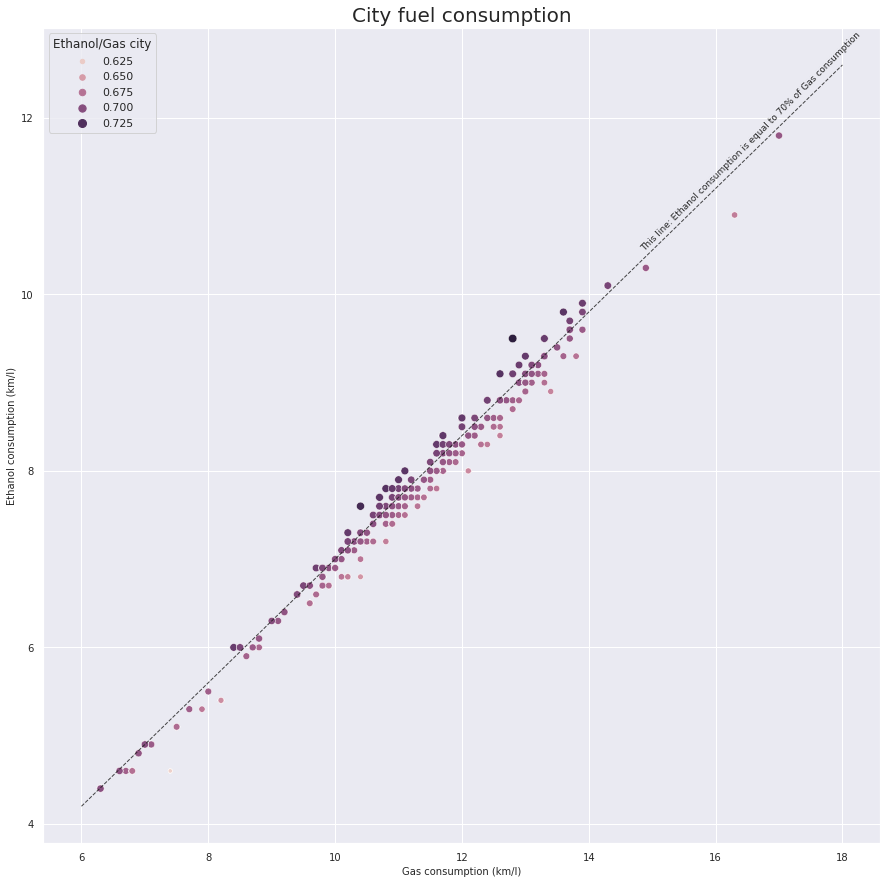

In [26]:
bins=[0.60, 0.625, 0.65, 0.675, 0.70, 0.725, 0.75]
df_prop=df.copy()
df_prop['city']=pd.cut(df_prop['Ethanol/Gas city'], bins, labels=['< 62.5%', '62.5-65%', '65-67.5%', '67.5-70%', '70-72.5%', '> 72.5%'])
df_prop['highway']=pd.cut(df_prop['Ethanol/Gas highway'], bins, labels=['< 62.5%', '62.5-65%', '65-67.5%', '67.5-70%', '70-72.5%', '> 72.5%'])

# Plotting city graph
sns.scatterplot(df['Gas or Diesel city (km/l)'], df['Ethanol city (km/l)'], hue=df['Ethanol/Gas city'], size=df['Ethanol/Gas city'], s=15)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Gas consumption (km/l)', size=10)
plt.ylabel('Ethanol consumption (km/l)', size=10)
plt.title('City fuel consumption', fontdict={'fontsize': 20})

plt.text(14.8, 10.5, 'This line: Ethanol consumption is equal to 70% of Gas consumption', rotation=45, size=9)

X_plot = np.linspace(6, 18)
Y_plot = (0.7/1)*X_plot
plt.plot(X_plot, Y_plot, '--', linewidth=1, alpha=0.8, color='k')
plt.show()

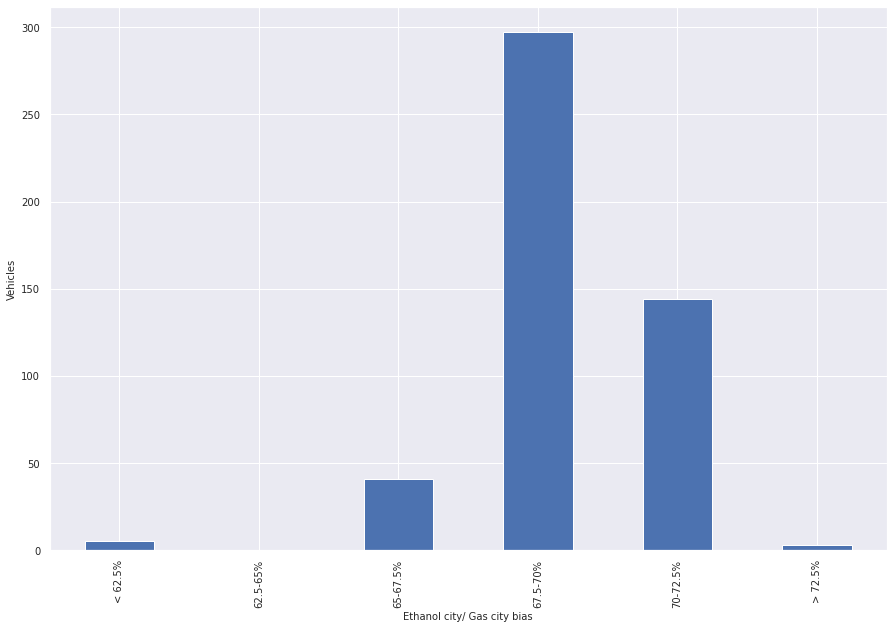

In [6]:
# Plotting city
da=df_prop['city'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ethanol city/ Gas city bias', size=10)
plt.ylabel('Vehicles', size=10) 
da.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


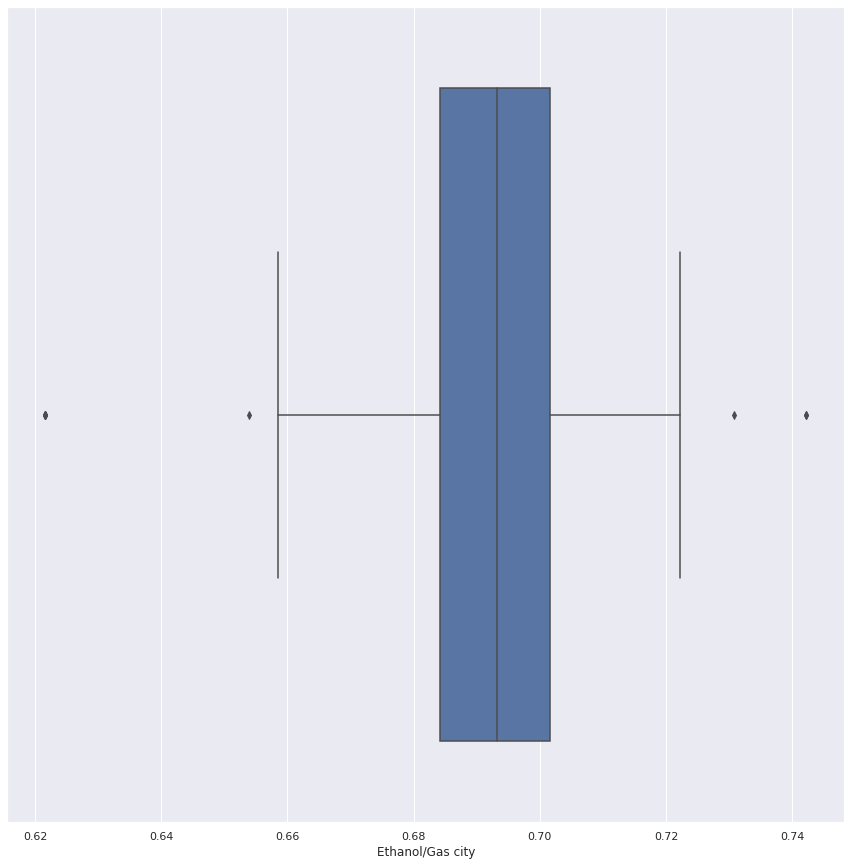

In [7]:
# Box-plot city
sns.boxplot(df['Ethanol/Gas city'])
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

The graphs show that for city mileage most vehicles have a Ethanol/Gas ratio under 70%.  

In [8]:
# Outliers Max bias city
max=df['Ethanol/Gas city'].idxmax()
df.loc[max]

Category                                    Médio
Brand                                     HYUNDAI
Model                                       HB20S
Version                              Vision 21/21
Engine                                    1.0-12V
Transmission                                  M-5
AC                                              S
Power steering                                  E
Engine type                             Combustão
Fuel type                                       F
NMHC (g/km)                                 0.016
CO (g/km)                                   0.555
NOx (g/km)                                  0.018
Reduction relative to the limit                 B
GHG Ethanol CO2 (g/km)                          0
GHG Gasoline or Diesel CO2 (g/km)            97.0
Ethanol city (km/l)                           9.5
Ethanol highway (km/l)                       10.6
Gas or Diesel city (km/l)                    12.8
Gas or Diesel highway (km/l)                 14.7


In [9]:
# Outliers Min bias city
min=df['Ethanol/Gas city'].idxmin()
df.loc[min]

Category                             Utilitário Esportivo\rGrande 4x4
Brand                                                          JAGUAR
Model                                                          E-PACE
Version                                                     P250F STD
Engine                                                        2.0-16V
Transmission                                                      A-9
AC                                                                  S
Power steering                                                      E
Engine type                                                 Combustão
Fuel type                                                           F
NMHC (g/km)                                                     0.006
CO (g/km)                                                       0.411
NOx (g/km)                                                      0.004
Reduction relative to the limit                                     A
GHG Ethanol CO2 (g/k



---
# **Highway analysis**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


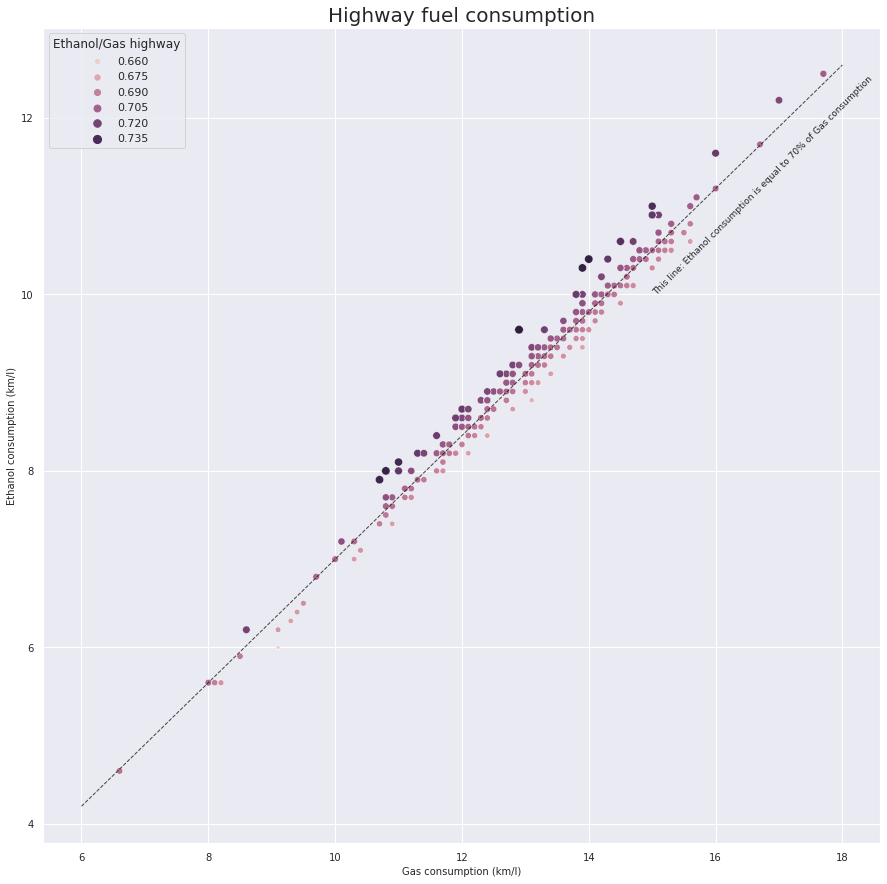

In [25]:
# Plotting highway graph
sns.scatterplot(df['Gas or Diesel highway (km/l)'], df['Ethanol highway (km/l)'], hue=df['Ethanol/Gas highway'], size=df['Ethanol/Gas highway'], s=15)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Gas consumption (km/l)', size=10)
plt.ylabel('Ethanol consumption (km/l)', size=10)
plt.title('Highway fuel consumption', fontdict={'fontsize': 20})

plt.text(15, 10, 'This line: Ethanol consumption is equal to 70% of Gas consumption', rotation=45, size=9)

X_plot = np.linspace(6, 18)
Y_plot = (0.7/1)*X_plot
plt.plot(X_plot, Y_plot, '--', linewidth=1, alpha=0.8, color='k')
plt.show()

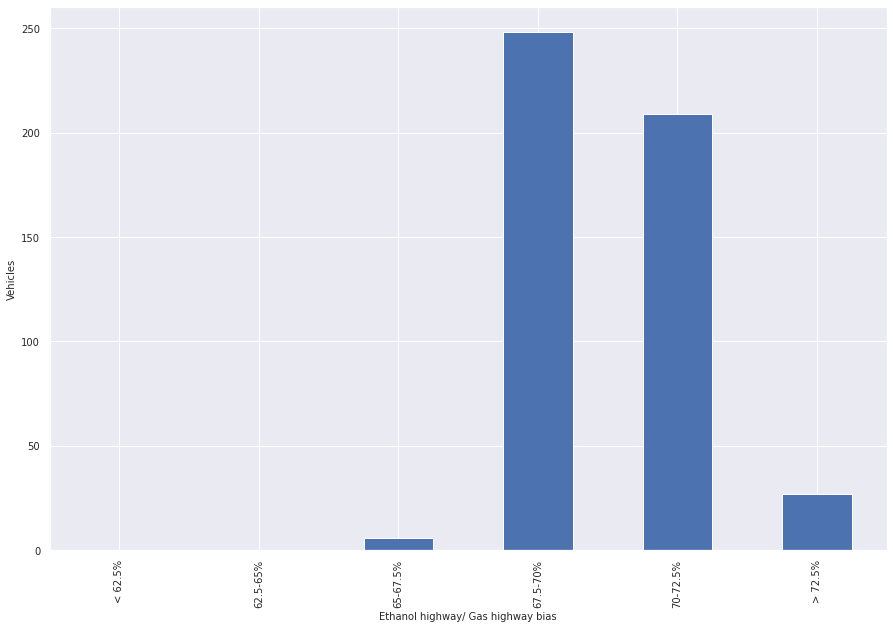

In [11]:
# Plotting highway
da=df_prop['highway'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Ethanol highway/ Gas highway bias', size=10)
plt.ylabel('Vehicles', size=10) 
da.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


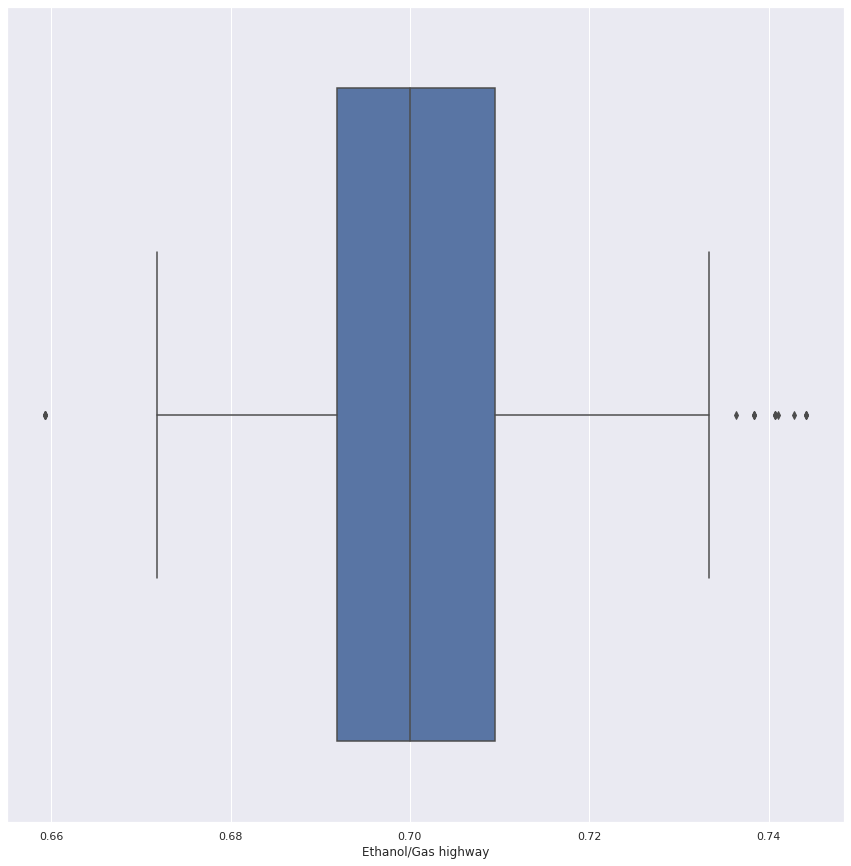

In [12]:
# Box-plot highway
sns.boxplot(df['Ethanol/Gas highway'])
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

The graphs show that for highway mileage the median of Ethanol/Gas ratio is around 70%.

In [13]:
# Outlier Max bias highway
max=df['Ethanol/Gas highway'].idxmax()
df.loc[max]

Category                                 Grande
Brand                                CAOA CHERY
Model                                  ARRIZO 5
Version                                      RT
Engine                                1.5T -16V
Transmission                                CVT
AC                                            S
Power steering                                E
Engine type                           Combustão
Fuel type                                     F
NMHC (g/km)                               0.019
CO (g/km)                                 0.272
NOx (g/km)                                0.015
Reduction relative to the limit               A
GHG Ethanol CO2 (g/km)                        0
GHG Gasoline or Diesel CO2 (g/km)         114.0
Ethanol city (km/l)                         7.6
Ethanol highway (km/l)                      9.6
Gas or Diesel city (km/l)                  11.0
Gas or Diesel highway (km/l)               12.9
Energy consumption (MJ/km)              

In [14]:
# Outlier Min bias highway
min=df['Ethanol/Gas highway'].idxmin()
df.loc[min]

Category                             Utilitário Esportivo\rGrande 4x4
Brand                                                          JAGUAR
Model                                                          E-PACE
Version                                                     P250F STD
Engine                                                        2.0-16V
Transmission                                                      A-9
AC                                                                  S
Power steering                                                      E
Engine type                                                 Combustão
Fuel type                                                           F
NMHC (g/km)                                                     0.006
CO (g/km)                                                       0.411
NOx (g/km)                                                      0.004
Reduction relative to the limit                                     A
GHG Ethanol CO2 (g/k



---



# **Classificating the dataset in four labels**
The idea is to visualize how the instances are distributed around the threshold of 70%.

In [15]:
# trying to do classification of four labels: over and under 70% for each type
def classification(df):
  label=[]
  for i in range(0, len(df)):
    if df['Ethanol/Gas city'].loc[i]<0.70:
      if df['Ethanol/Gas highway'].loc[i]<0.70:
        label.append('A')
      else:
        label.append('B')
    else:
      if df['Ethanol/Gas highway'].loc[i]>=0.70:
        label.append('C')
      else:
        label.append('D')
  df_prop['Clusters2']=label

In [16]:
classification(df_prop)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


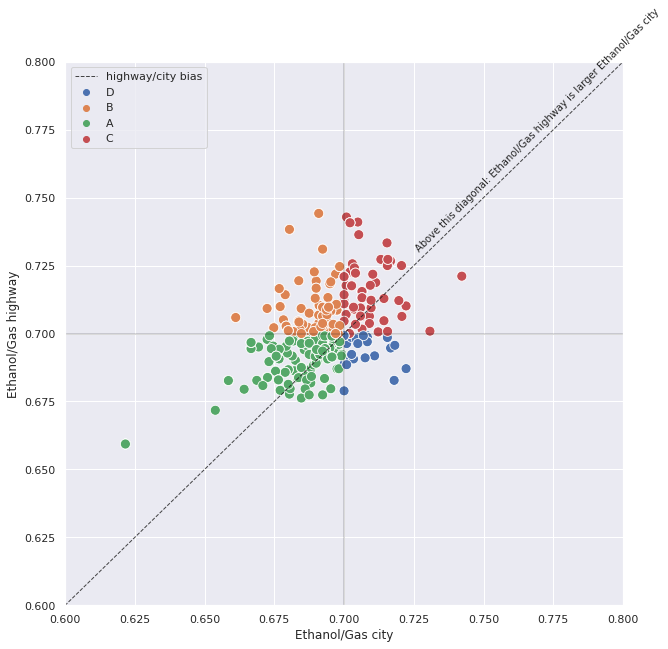

In [17]:
# Highway VS city bias regarding Ethanol vs gas
sns.scatterplot(df_prop['Ethanol/Gas city'], df_prop['Ethanol/Gas highway'], hue=df_prop['Clusters2'], palette='deep', s=100)
#palette='deep', s=40)
sns.set(rc={'figure.figsize':(15,15)})
plt.xlim(0.6,0.8)
plt.ylim(0.6,0.8)

plt.text(0.725, 0.73, 'Above this diagonal: Ethanol/Gas highway is larger Ethanol/Gas city', rotation=45, size=10)


X_plot = np.linspace(0, 18)
Y_plot = (1)*X_plot
plt.plot(X_plot, Y_plot, '--', linewidth=1, alpha=0.8, color='k', label='highway/city bias')
plt.plot([0.70, 0.70], [0, 1], '-', linewidth=0.4, alpha=0.8, color='k')
plt.plot([0, 1], [0.70, 0.70], '-', linewidth=0.4, alpha=0.8, color='k')
plt.legend()
plt.show()

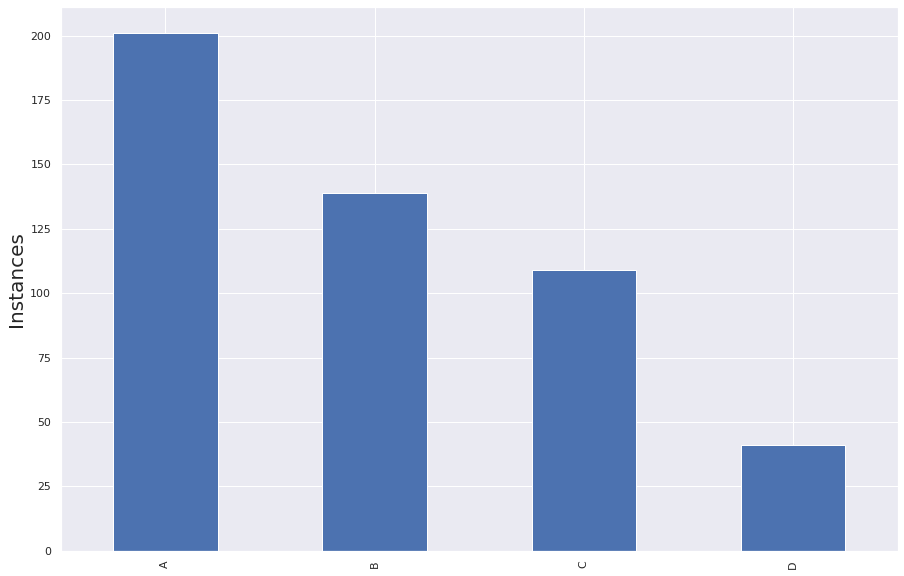

In [18]:
# Showing the distribution of the classes
da=df_prop['Clusters2'].value_counts()
plt.figure(figsize=(15,10))
plt.ylabel('Instances', size=20)
da.plot(kind="bar")

The dominant category is 'A'(green): under 70% Ethanol/Gas for both city and highway. 

# **Linear regression**
Finding the linear regression line for each of the two cases (city and highway) and comparing it with the 70% threshold line. It is over or under the 70%?

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

lin_reg1=LinearRegression()
lin_reg1.fit(df_prop[['Gas or Diesel city (km/l)']], df_prop[['Ethanol city (km/l)']])
lin_reg1.intercept_, lin_reg1.coef_

lin_reg2=LinearRegression()
lin_reg2.fit(df_prop[['Gas or Diesel highway (km/l)']], df_prop[['Ethanol highway (km/l)']])
lin_reg2.intercept_, lin_reg2.coef_

(array([-0.09237418]), array([[0.70863639]]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


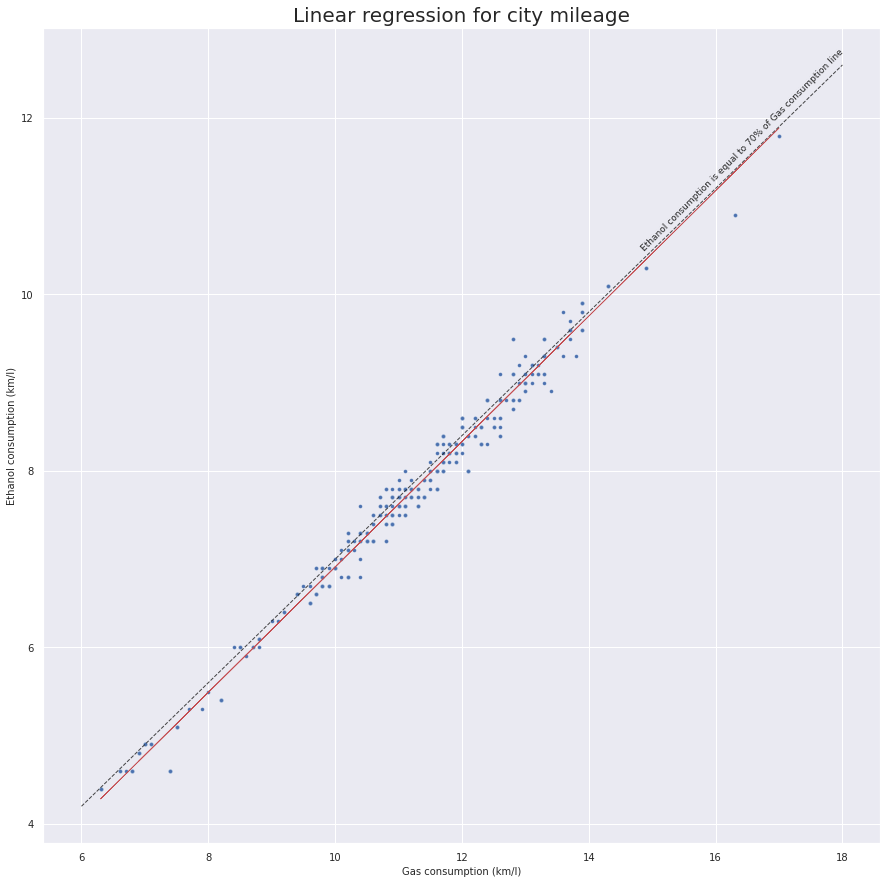

In [22]:
# Plotting city and highway graphs
sns.scatterplot(df['Gas or Diesel city (km/l)'], df['Ethanol city (km/l)'], s=15)
#sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Gas consumption (km/l)', size=10)
plt.ylabel('Ethanol consumption (km/l)', size=10)
plt.title('Linear regression for city mileage', fontdict={'fontsize': 20})

plt.text(14.8, 10.5, 'Ethanol consumption is equal to 70% of Gas consumption line', rotation=45, size=9)

X_plot = np.linspace(6, 18)
Y_plot = (0.7/1)*X_plot
plt.plot(X_plot, Y_plot, '--', linewidth=1, alpha=0.8, color='k')

# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.plot(df_prop['Gas or Diesel city (km/l)'], lin_reg1.coef_[0][0]*df_prop['Gas or Diesel city (km/l)'] + lin_reg1.intercept_[0], linewidth=0.7, color='r') 
plt.show()

The regression line is under the 70% line for city mileage.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


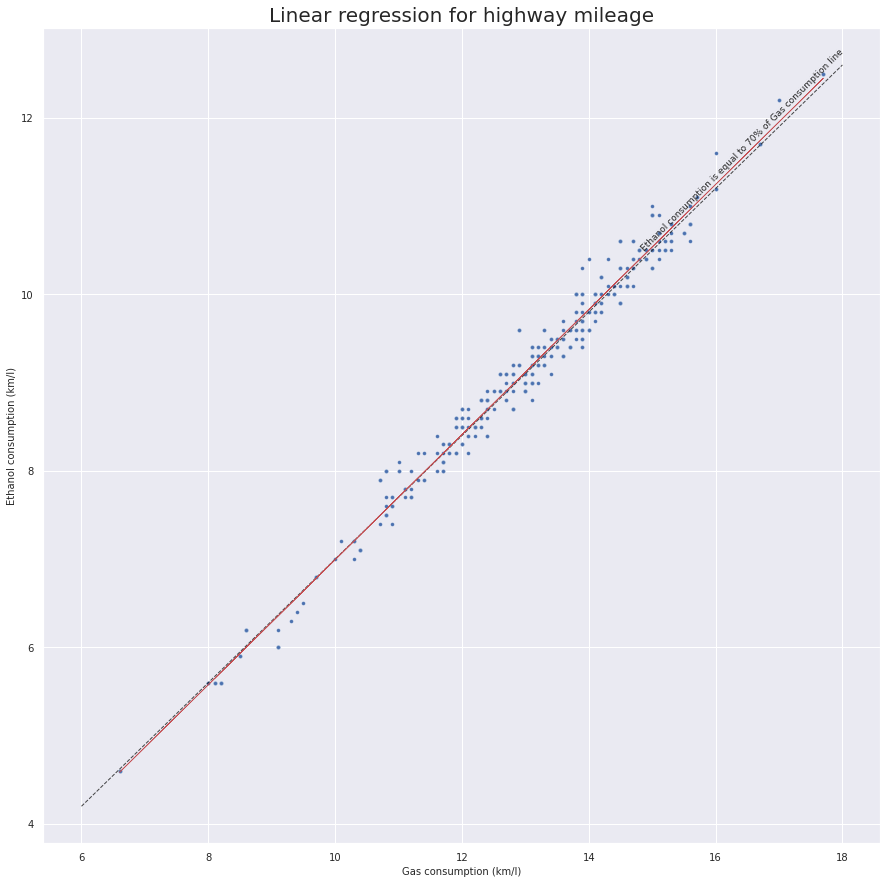

In [23]:
# Plotting city and highway graphs
sns.scatterplot(df['Gas or Diesel highway (km/l)'], df['Ethanol highway (km/l)'], s=15)
#sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Gas consumption (km/l)', size=10)
plt.ylabel('Ethanol consumption (km/l)', size=10)
plt.title('Linear regression for highway mileage', fontdict={'fontsize': 20})

plt.text(14.8, 10.5, 'Ethanol consumption is equal to 70% of Gas consumption line', rotation=45, size=9)

X_plot = np.linspace(6, 18)
Y_plot = (0.7/1)*X_plot
plt.plot(X_plot, Y_plot, '--', linewidth=1, alpha=0.8, color='k')

# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.plot(df_prop['Gas or Diesel highway (km/l)'], lin_reg2.coef_[0][0]*df_prop['Gas or Diesel highway (km/l)'] + lin_reg2.intercept_[0], linewidth=0.7, color='r') 
plt.show()

The regression line is around the 70% line for highway mileage.


---



# **Conclusion**
On average, highway mileage has an Ethanol/Gas ratio around 70%, while city mileage is under 70%. Meaning that, city tends to favour gasoline use over ethanol.

Every vehicle has different characteristics so instead of using a fixed threshold number, it is better to search for the car.

# **Searching for a vehicle**
This code is used to search for a specific vehicle in the database. For example, Fiat Pulse.

In [24]:
# Search for a specific vehicle
model=input(str('Which model? '))
idx = df.index[df['Model']==model.upper()]
temp=[]
for i in idx:
  temp.append(i)

search=df.iloc[temp[0]:temp[-1]+1,:].copy()
search

Which model? pulse


,Category,Brand,Model,Version,Engine,Transmission,AC,Power steering,Engine type,Fuel type,...,GHG Gasoline or Diesel CO2 (g/km),Ethanol city (km/l),Ethanol highway (km/l),Gas or Diesel city (km/l),Gas or Diesel highway (km/l),Energy consumption (MJ/km),PBE category ranking,PBE overall ranking,Ethanol/Gas city,Ethanol/Gas highway
291,Utilitário Esportivo\rCompacto,FIAT,PULSE,MT,1.3-8V,M-5,S,E,Combustão,F,...,98.0,9.1,10.1,12.6,14.7,1.57,A,B,0.722222,0.687075
292,Utilitário Esportivo\rCompacto,FIAT,PULSE,DRIVE AT,1.3-8V,CVT-7,S,E,Combustão,F,...,98.0,9.2,10.4,12.9,14.3,1.56,A,B,0.713178,0.727273
293,Utilitário Esportivo\rCompacto,FIAT,PULSE,DRIVE TF200,1.0 12V\rTURBO,CVT-7,S,E,Combustão,F,...,102.0,8.5,10.2,12.0,14.6,1.64,B,B,0.708333,0.698630
294,Utilitário Esportivo\rCompacto,FIAT,PULSE,AUDACE TF200,1.0 12V\rTURBO,CVT-7,S,E,Combustão,F,...,102.0,8.5,10.2,12.0,14.6,1.64,B,B,0.708333,0.698630
295,Utilitário Esportivo\rCompacto,FIAT,PULSE,IMPETUS TF200,1.0 12V\rTURBO,CVT-7,S,E,Combustão,F,...,102.0,8.5,10.2,12.0,14.6,1.64,B,B,0.708333,0.698630
